In [7]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
print('Import complete')


Import complete


In [8]:
bike_data = pd.read_csv("../data/bikes.csv")

In [9]:
# bike_data.columns
# bike_data.sample(10)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  657 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [10]:
bikes_imputted = bike_data.copy()

bikes_imputted

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,4.00,1.00,100.00,9.000000,cloudy,False,False,winter,11566
726,31/12/2016,7.50,5.00,90.00,13.312500,cloudy,False,True,winter,11424
727,01/01/2017,7.00,4.75,90.00,14.125000,rain,False,True,winter,6421
728,02/01/2017,3.25,0.50,82.50,11.166667,clear,True,False,winter,11823


# Interpolation by filling missing values with median

In [11]:
# Impute the missing data for feel_temperature using the median 
# fills the numerical data

# Calculate the mean of the column
median_feel_temp = bikes_imputted["feel_temperature"].median()


# # Fill missing values
bikes_imputted["feel_temperature"] = bikes_imputted["feel_temperature"].fillna(median_feel_temp)
# bikes_temp_imputted.sample(10)
# bikes_imputted.sample(20)
bikes_imputted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


# Interpolation by padding 

In [12]:
# Fills the categorical data e.g seasons 
# Fill missing values in season column using interpolation by padding
bikes_imputted['season'].interpolate(method='pad', inplace=True)

# bikes_imputted.info()
bikes_imputted.sample(10)


C:\Users\OneSud\AppData\Local\Temp\ipykernel_21016\3454269653.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bikes_imputted['season'].interpolate(method='pad', inplace=True)
C:\Users\OneSud\AppData\Local\Temp\ipykernel_21016\3454269653.py:3: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bikes_imputted['season'].interpolate(method='pad', inplace=True)


,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
656,22/10/2016,10.00,10.00,82.00,8.312500,scattered_clouds,False,True,autumm,26020
51,24/02/2015,6.75,3.00,69.75,27.000000,scattered_clouds,False,False,winter,23688
412,20/02/2016,11.00,11.00,79.50,27.956522,rain,False,True,winter,10745
716,21/12/2016,11.00,12.50,83.25,17.166667,broken_clouds,False,False,winter,23136
361,31/12/2015,9.50,6.25,69.75,23.395833,scattered_clouds,False,False,winter,13889
484,02/05/2016,12.00,12.50,77.00,20.770833,scattered_clouds,True,False,spring,19428
326,26/11/2015,10.00,8.00,88.00,7.541667,broken_clouds,False,False,autumm,26626
482,30/04/2016,9.50,8.00,60.00,12.270833,clear,False,True,spring,24698
614,10/09/2016,19.00,12.50,80.50,16.333333,NaN,False,True,autumm,17080
546,03/07/2016,17.25,17.25,66.00,14.437500,clear,False,True,summer,33668


In [13]:
# You can perform data aggregation to be able to fill the missing weather codes with the mode of the specific season we in. 

weather_code_bk= bikes_imputted['weather_code'].mode()[0]

# bikes_imputted['weather_code'].unique()

# print('valu:',weather_code_bk)
bikes_imputted['weather_code'] = bikes_imputted['weather_code'].fillna(weather_code_bk)
bikes_imputted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      730 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [14]:
# One hot Encoding(dummy enconding)--> creates new features/columns 
# one hot envoding for the season column

# Fetch the season data as a new df and create it into a new dataframe with only the season column
season_data = pd.DataFrame(data=bike_data['season'], columns= ['season'])
# Create a one-hot encoder object 
one_hot_encode =OneHotEncoder() 

# season_data.head()

# we use the double [[]] to convert the series df to an array. 
ohe_array = one_hot_encode.fit_transform(season_data[['season']]).toarray()
col_names= one_hot_encode.get_feature_names_out(['season'])

# convert the array into a dataframe 
ohe_season_data = pd.DataFrame(data= ohe_array, columns= col_names)

# join the datarames 

season_data= pd.concat([season_data, ohe_season_data], axis=1)


season_data.sample(10)

,season,season_autumm,season_spring,season_summer,season_winter,season_nan
428,NaN,0.0,0.0,0.0,0.0,1.0
91,spring,0.0,1.0,0.0,0.0,0.0
560,summer,0.0,0.0,1.0,0.0,0.0
225,summer,0.0,0.0,1.0,0.0,0.0
583,summer,0.0,0.0,1.0,0.0,0.0
690,autumm,1.0,0.0,0.0,0.0,0.0
83,spring,0.0,1.0,0.0,0.0,0.0
592,summer,0.0,0.0,1.0,0.0,0.0
630,autumm,1.0,0.0,0.0,0.0,0.0
472,spring,0.0,1.0,0.0,0.0,0.0


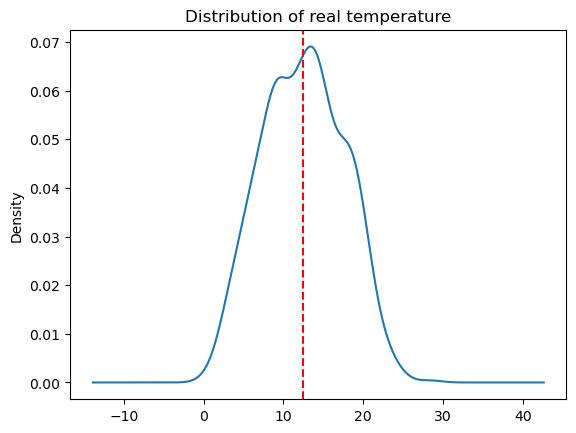

In [15]:
# create a density plot to visualize dstribution of real temperature 
ax=bike_data['real_temperature'].plot.density(title='Distribution of real temperature')

mean_real_temp= bike_data['real_temperature'].mean()

plt.axvline(x=mean_real_temp, color= 'r', linestyle='--',label= 'mean')

# Data Standadization

In [16]:
std_scaler =StandardScaler()
# use the standard scaller to perform standardized values from the real temperature. then pass a  collection e.g list to the standard scaler model
bike_data['scaled_real_temp']= std_scaler.fit_transform(X=bike_data[['real_temperature']])

In [17]:
bike_data[['real_temperature','scaled_real_temp']]


,real_temperature,scaled_real_temp
0,2.75,-1.914593
1,9.00,-0.685001
2,8.00,-0.881736
3,9.00,-0.685001
4,9.00,-0.685001
...,...,...
725,4.00,-1.668675
726,7.50,-0.980103
727,7.00,-1.078470
728,3.25,-1.816226


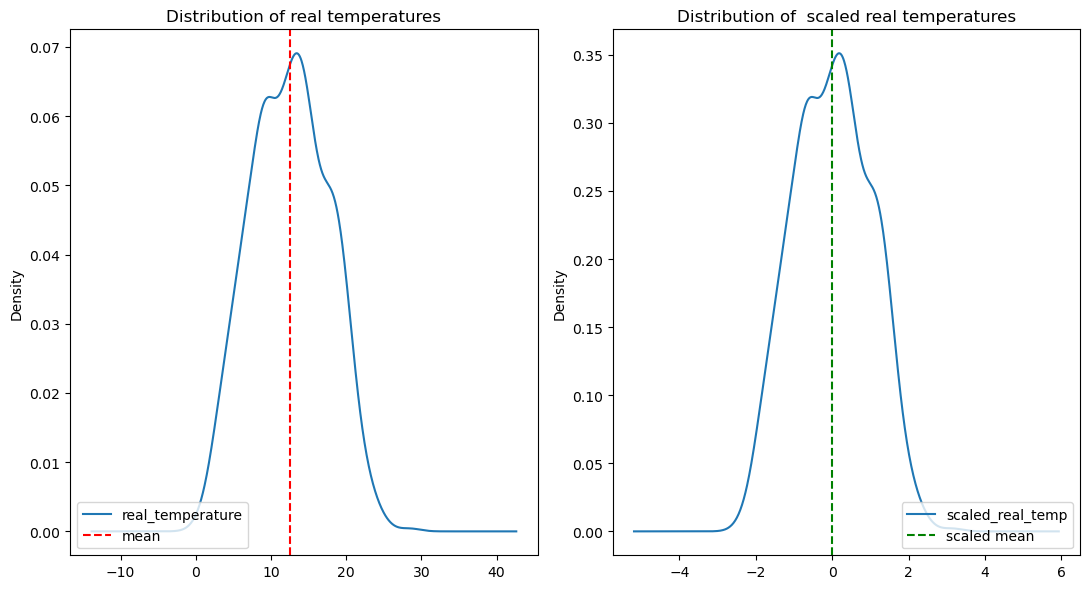

In [18]:
# plot the new plot

fig, (ax1, ax2)= plt.subplots(ncols=2 ,figsize=(11,6))

bike_data['real_temperature'].plot.density(ax=ax1, title='Distribution of real temperatures')

mean_real_temp= bike_data['real_temperature'].mean()

ax1.axvline(x=mean_real_temp, color= 'r', linestyle='--',label= 'mean')
ax1.legend(loc='lower left')
# Plot the standardized value to plot the ax1 plot 

ax2=bike_data['scaled_real_temp'].plot.density(ax=ax2,title='Distribution of  scaled real temperatures')

mean_scaled_real_temp= bike_data['scaled_real_temp'].mean()

ax2.axvline(x=mean_scaled_real_temp, color= 'g', linestyle='--',label= 'scaled mean')
ax2.legend(loc='lower right')
# Adjust kayout and display all plots
plt.tight_layout()
plt.show()


# Composite transformation using ColumnTransformer


In [19]:

bike_data.head()

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count,scaled_real_temp
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234,-1.914593
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372,-0.685001
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613,-0.881736
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064,-0.685001
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601,-0.685001


In [20]:
from   sklearn.compose import make_column_transformer
column_transform= make_column_transformer( (bike_data['real_temperature'], StandardScaler() ), (bike_data['season'], OneHotEncoder() ))

In [21]:
column_transform

ColumnTransformer(transformers=[('series-1',
                                 0      2.75
1      9.00
2      8.00
3      9.00
4      9.00
       ... 
725    4.00
726    7.50
727    7.00
728    3.25
729    4.50
Name: real_temperature, Length: 730, dtype: float64,
                                 StandardScaler()),
                                ('series-2',
                                 0      winter
1      winter
2      winter
3      winter
4      winter
        ...  
725    winter
726    winter
727    winter
728    winter
729    winter
Name: season, Length: 730, dtype: object,
                                 OneHotEncoder())])

In [22]:
# Feature Selection


In [23]:
# create a correlation matrix for the numerical variables 
num_variables= bike_data.select_dtypes(include='number')
corr_matrix = num_variables.corr()

# make the heatmap out of the corr_matrix

corr_matrix.style.background_gradient(cmap='coolwarm')

,real_temperature,feel_temperature,humidity,wind_speed,count,scaled_real_temp
real_temperature,1.000000,0.989222,-0.373399,0.045599,0.669005,1.000000
feel_temperature,0.989222,1.000000,-0.352682,0.012389,0.665428,0.989222
humidity,-0.373399,-0.352682,1.000000,-0.191216,-0.539293,-0.373399
wind_speed,0.045599,0.012389,-0.191216,1.000000,-0.197499,0.045599
count,0.669005,0.665428,-0.539293,-0.197499,1.000000,0.669005
scaled_real_temp,1.000000,0.989222,-0.373399,0.045599,0.669005,1.000000
